In [1]:
from sys import path
import os
path.append(os.path.realpath("../"))

In [2]:
# Standard imports
import pandas as pd
import numpy as np
import seaborn as sns
##import plotly.express as px
import folium
import matplotlib.pyplot as plt
%matplotlib inline

#from biblioteca import misFunciones as mf

In [3]:
population_df = pd.read_csv("DataSet Population EEUU.csv")

In [4]:
population_df.head(20)

,Label (Grouping),SEX AND AGE,SEX AND AGE!!Total population,SEX AND AGE!!Total population!!Male,SEX AND AGE!!Total population!!Female,SEX AND AGE!!Total population!!Sex ratio (males per 100 females),SEX AND AGE!!Total population!!Under 5 years,SEX AND AGE!!Total population!!5 to 9 years,SEX AND AGE!!Total population!!10 to 14 years,SEX AND AGE!!Total population!!15 to 19 years,...,HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone,HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone,HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races,HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races including Some other race,"HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races!!Two races excluding Some other race, and Three or more races",Total housing units,"CITIZEN, VOTING AGE POPULATION","CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population","CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Male","CITIZEN, VOTING AGE POPULATION!!Citizen, 18 and over population!!Female"
0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Estimate,NaN,"5,039,877","2,445,896","2,593,981",94.3,"290,091","298,540","337,730","338,347",...,"1,661","15,944","169,344","28,472","140,872","2,313,616",NaN,"3,829,788","1,827,345","2,002,443"
2,Percent,NaN,"5,039,877",48.5%,51.5%,(X),5.8%,5.9%,6.7%,6.7%,...,0.0%,0.3%,3.4%,0.6%,2.8%,(X),NaN,"3,829,788",47.7%,52.3%
3,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Estimate,NaN,"732,673","383,121","349,552",109.6,"46,198","52,071","52,507","50,263",...,"10,994","3,744","75,177","8,278","66,899","327,889",NaN,"533,852","281,367","252,485"
5,Percent,NaN,"732,673",52.3%,47.7%,(X),6.3%,7.1%,7.2%,6.9%,...,1.5%,0.5%,10.3%,1.1%,9.1%,(X),NaN,"533,852",52.7%,47.3%
6,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Estimate,NaN,"7,276,316","3,629,620","3,646,696",99.5,"402,255","446,309","476,245","482,998",...,"11,269","41,944","296,151","60,311","235,840","3,138,685",NaN,"5,216,518","2,584,180","2,632,338"
8,Percent,NaN,"7,276,316",49.9%,50.1%,(X),5.5%,6.1%,6.5%,6.6%,...,0.2%,0.6%,4.1%,0.8%,3.2%,(X),NaN,"5,216,518",49.5%,50.5%
9,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
population_modify_df = population_df[["Label (Grouping)", "SEX AND AGE!!Total population"]]

In [6]:
population_modify_df

,Label (Grouping),SEX AND AGE!!Total population
0,Alabama,NaN
1,Estimate,"5,039,877"
2,Percent,"5,039,877"
3,Alaska,NaN
4,Estimate,"732,673"
...,...,...
151,Estimate,"578,803"
152,Percent,"578,803"
153,Puerto Rico,NaN
154,Estimate,"3,263,584"


In [7]:
population_modify_df.rename(columns={'Label (Grouping)': 'State'}, inplace=True)
population_modify_df.rename(columns={'SEX AND AGE!!Total population': 'Total population'}, inplace=True)

C:\Users\victo\AppData\Local\Temp\ipykernel_7344\375231065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_modify_df.rename(columns={'Label (Grouping)': 'State'}, inplace=True)
C:\Users\victo\AppData\Local\Temp\ipykernel_7344\375231065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_modify_df.rename(columns={'SEX AND AGE!!Total population': 'Total population'}, inplace=True)


In [8]:
population_modify_df

,State,Total population
0,Alabama,NaN
1,Estimate,"5,039,877"
2,Percent,"5,039,877"
3,Alaska,NaN
4,Estimate,"732,673"
...,...,...
151,Estimate,"578,803"
152,Percent,"578,803"
153,Puerto Rico,NaN
154,Estimate,"3,263,584"


In [9]:
nulos_por_columna = population_modify_df.isnull().sum()

print(nulos_por_columna)

State                0
Total population    52
dtype: int64


In [10]:
population_modify_df.iloc[:, 1:] = population_modify_df.iloc[:, 1:].apply(lambda x: x.shift(-1))
population_modify_df = population_modify_df.iloc[::3]
population_modify_df = population_modify_df.reset_index(drop=True)

C:\Users\victo\AppData\Local\Temp\ipykernel_7344\3241023002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_modify_df.iloc[:, 1:] = population_modify_df.iloc[:, 1:].apply(lambda x: x.shift(-1))


In [11]:
population_modify_df.head()

,State,Total population
0,Alabama,"5,039,877"
1,Alaska,"732,673"
2,Arizona,"7,276,316"
3,Arkansas,"3,025,891"
4,California,"39,237,836"


In [12]:
population_modify_df['Total population'] = population_modify_df['Total population'].str.replace(',', '').astype(int)


In [13]:




# Definir los rangos para las categorías
alta_densidad = population_modify_df['Total population'].quantile(0.7)
baja_densidad = population_modify_df['Total population'].quantile(0.3)

# Crear la columna "Categoría de densidad"
population_modify_df['Categoría de densidad'] = pd.cut(population_modify_df['Total population'], bins=[0, baja_densidad, alta_densidad, float('inf')], labels=['Baja', 'Mediana', 'Alta'])



In [14]:
population_modify_df

,State,Total population,Categoría de densidad
0,Alabama,5039877,Mediana
1,Alaska,732673,Baja
2,Arizona,7276316,Alta
3,Arkansas,3025891,Mediana
4,California,39237836,Alta
5,Colorado,5812069,Mediana
6,Connecticut,3605597,Mediana
7,Delaware,1003384,Baja
8,District of Columbia,670050,Baja
9,Florida,21781128,Alta


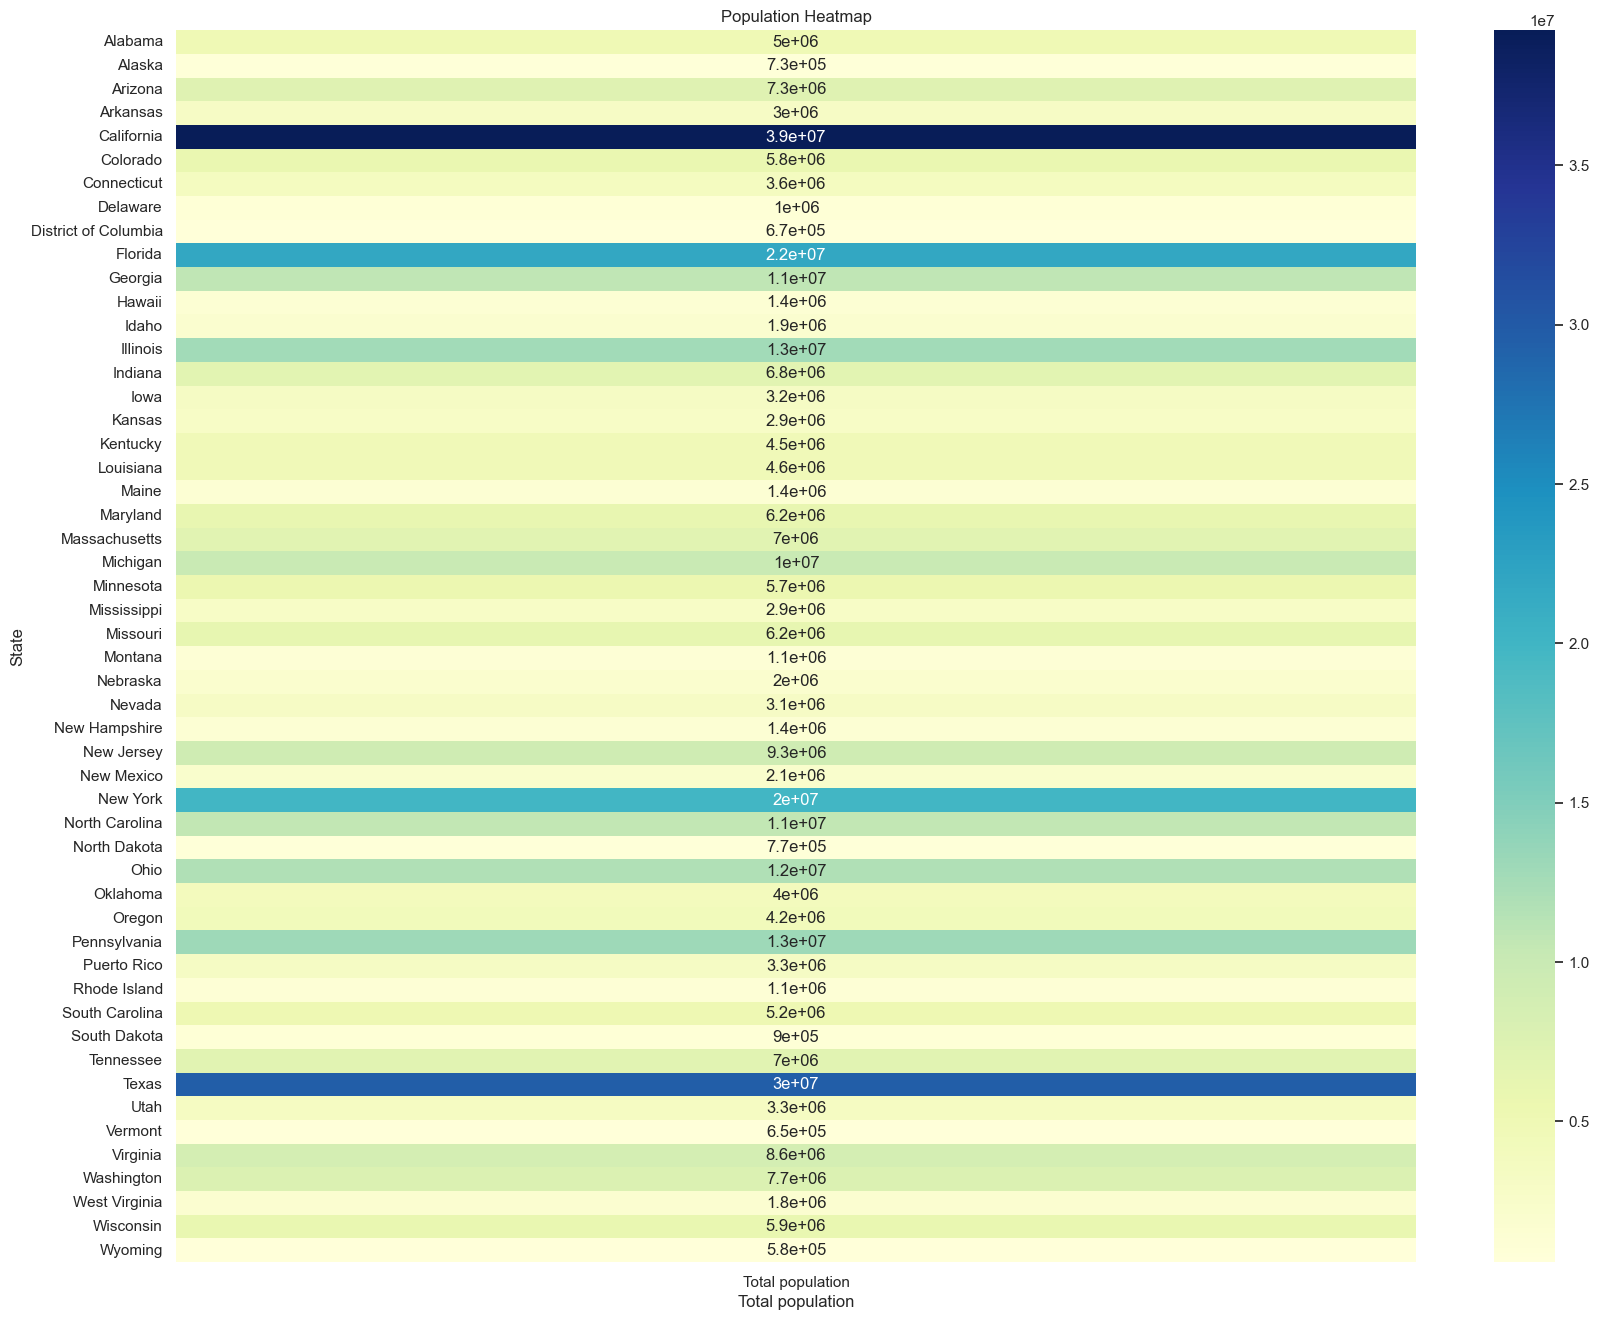

In [15]:
# Crear un mapa de calor
sns.set(style="whitegrid")
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(population_modify_df.pivot_table(index='State', values='Total population'), annot=True, cmap="YlGnBu")

# Configurar etiquetas y título
plt.xlabel("Total population")
plt.ylabel("State")
plt.title("Population Heatmap")

# Mostrar el mapa de calor
plt.show()

In [16]:
# # Crear una matriz de datos bidimensional
# heatmap_data = population_modify_df.pivot_table(index='State', values='Total population', aggfunc='sum').values

# # Crear el mapa de calor interactivo con Plotly
# fig = px.imshow(heatmap_data,
#                 labels=dict(x="Total population", y="State"),
#                 x=[population_modify_df['Total population'].min(), population_modify_df['Total population'].max()],
#                 y=population_modify_df['State'],
#                 color_continuous_scale='YlGnBu')

# # Configurar el título
# fig.update_layout(title="Population Heatmap")

# # Mostrar el gráfico interactivo
# fig.show()

In [17]:
population_modify_df.to_csv("../Data_tratados/Population_limpio.csv",index=False)